In [128]:
import pip
pip.main(['install','seaborn'])
# import seaborn as sns


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.8.1-cp39-cp39-win_amd64.whl (36.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\Users\\msaba\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\scipy\\.libs\\lib_arpack-.FHZLNSBUVRGIXZM3SKICSGEZ35NSETJH.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\msaba\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


1

In [129]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=[0], index_col=[0])

In [274]:
df_clean = df[(df['value']>=df['value'].quantile(0.025)) &
    (df['value']<=df['value'].quantile(0.975))]
df_clean

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [155]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df_clean, legend=False, palette=['r'])

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

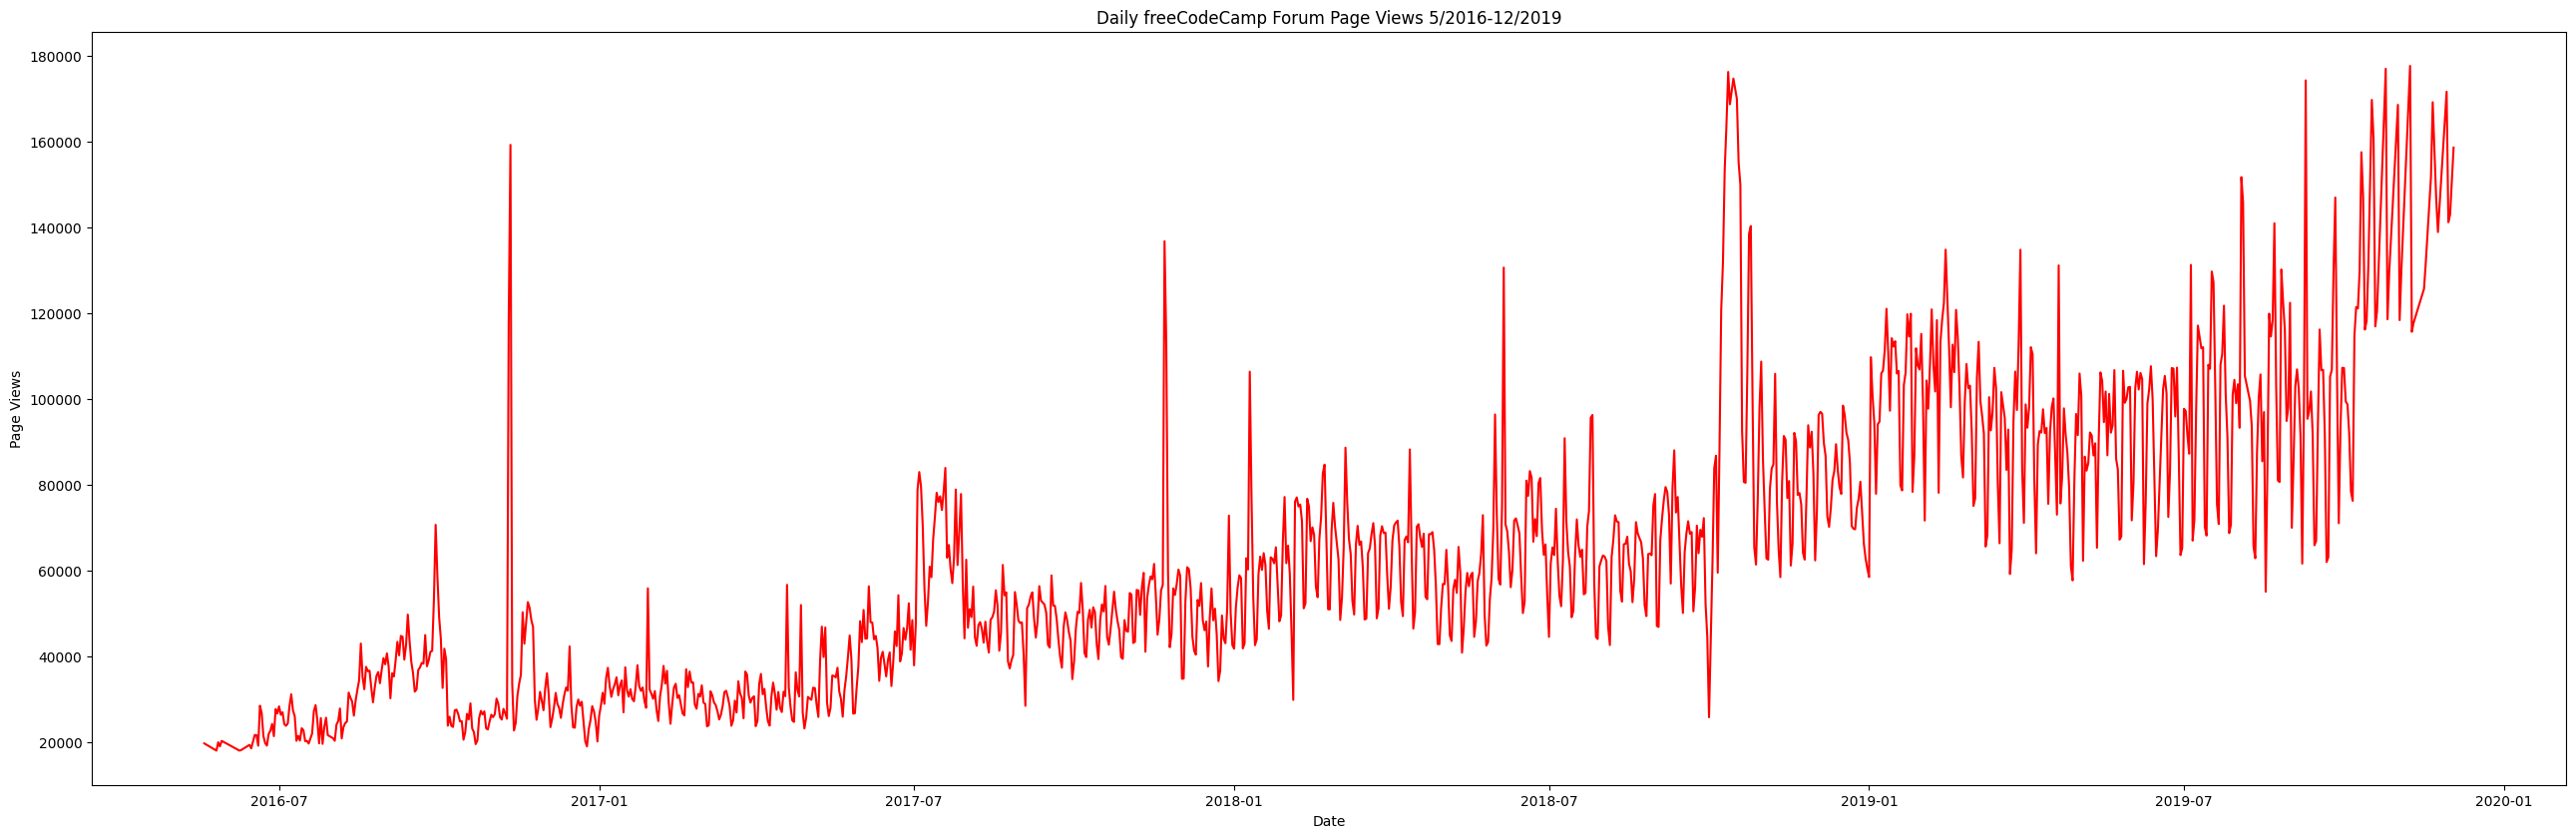

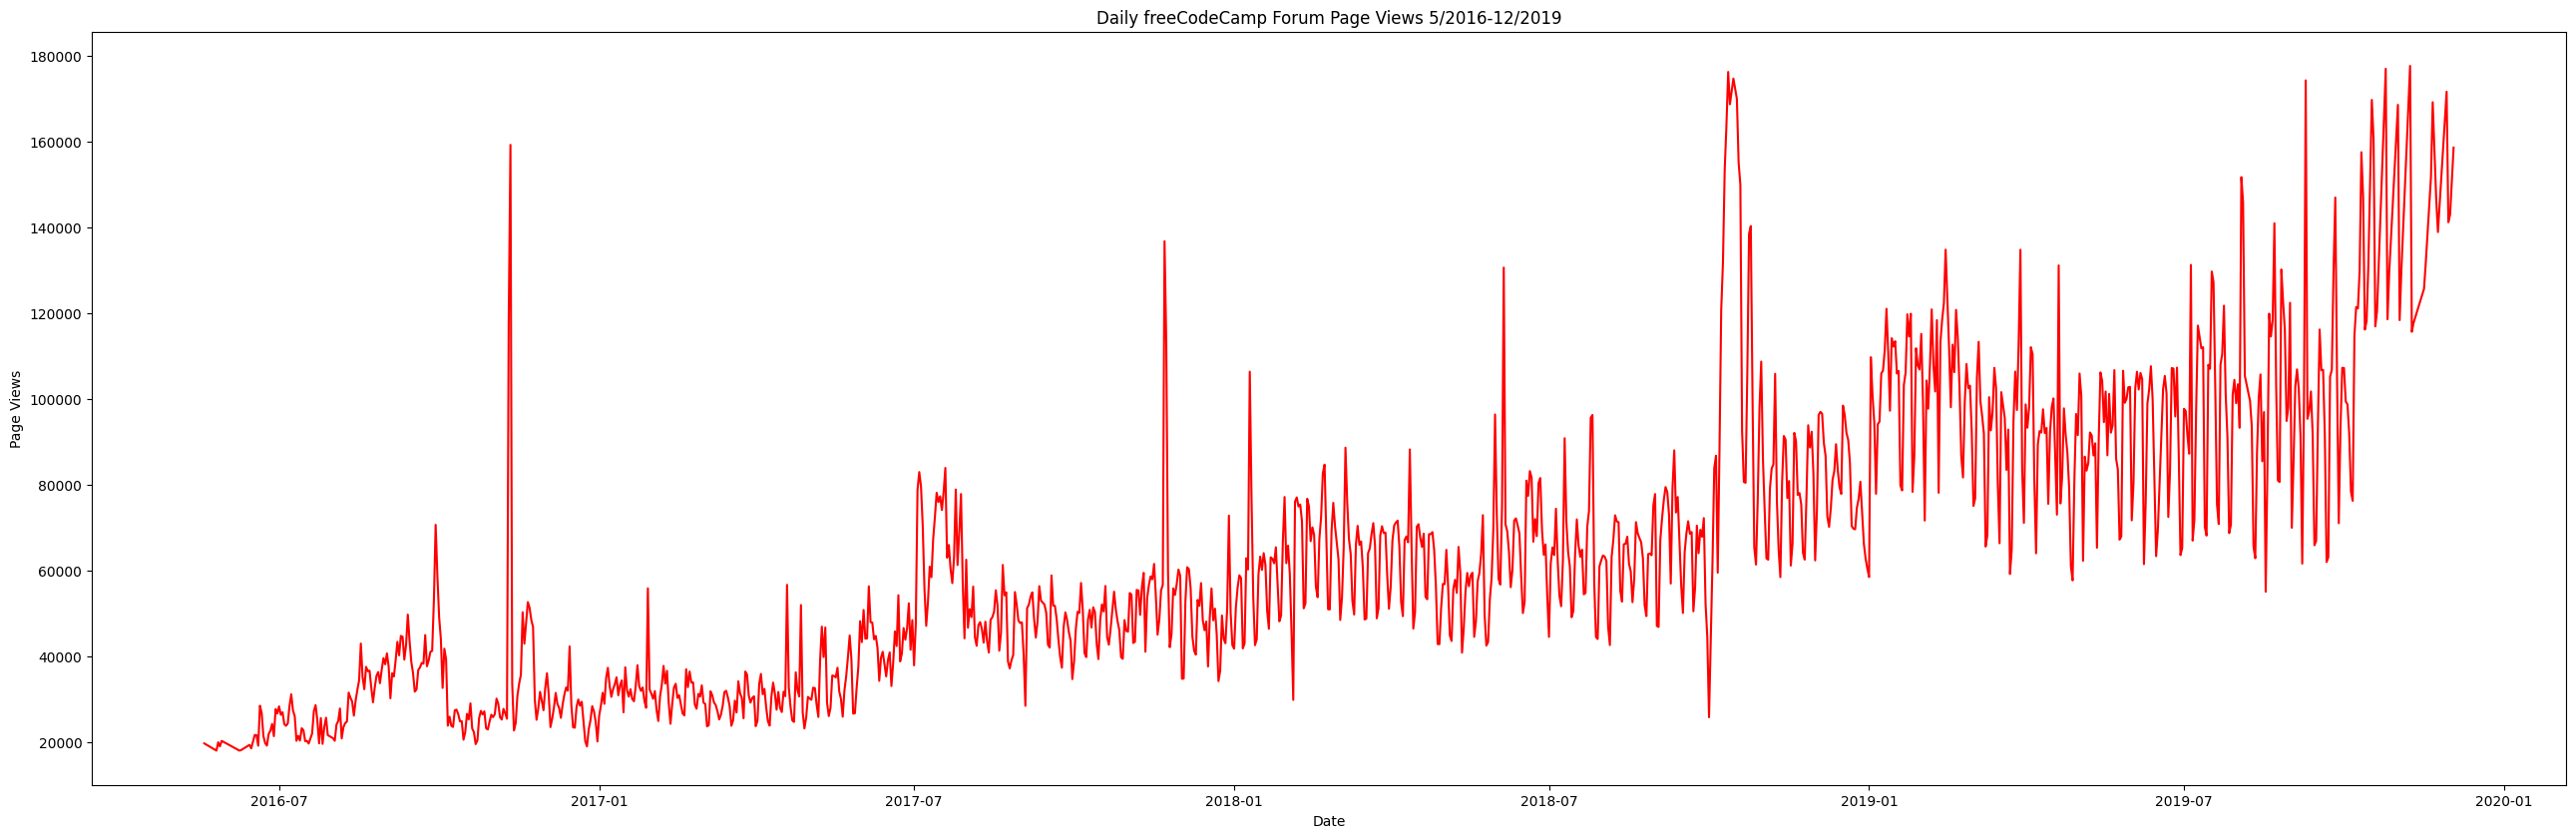

In [156]:
draw_line_plot()

In [164]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df_clean.copy()
    df_bar["Years"] = df_bar.index.year
    df_bar["Months"] = df_bar.index.month_name()
    df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
    df_bar = df_bar.rename(columns={"value": "Average Page Views"})
    df_bar = df_bar.reset_index()
    missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

    df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

    chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


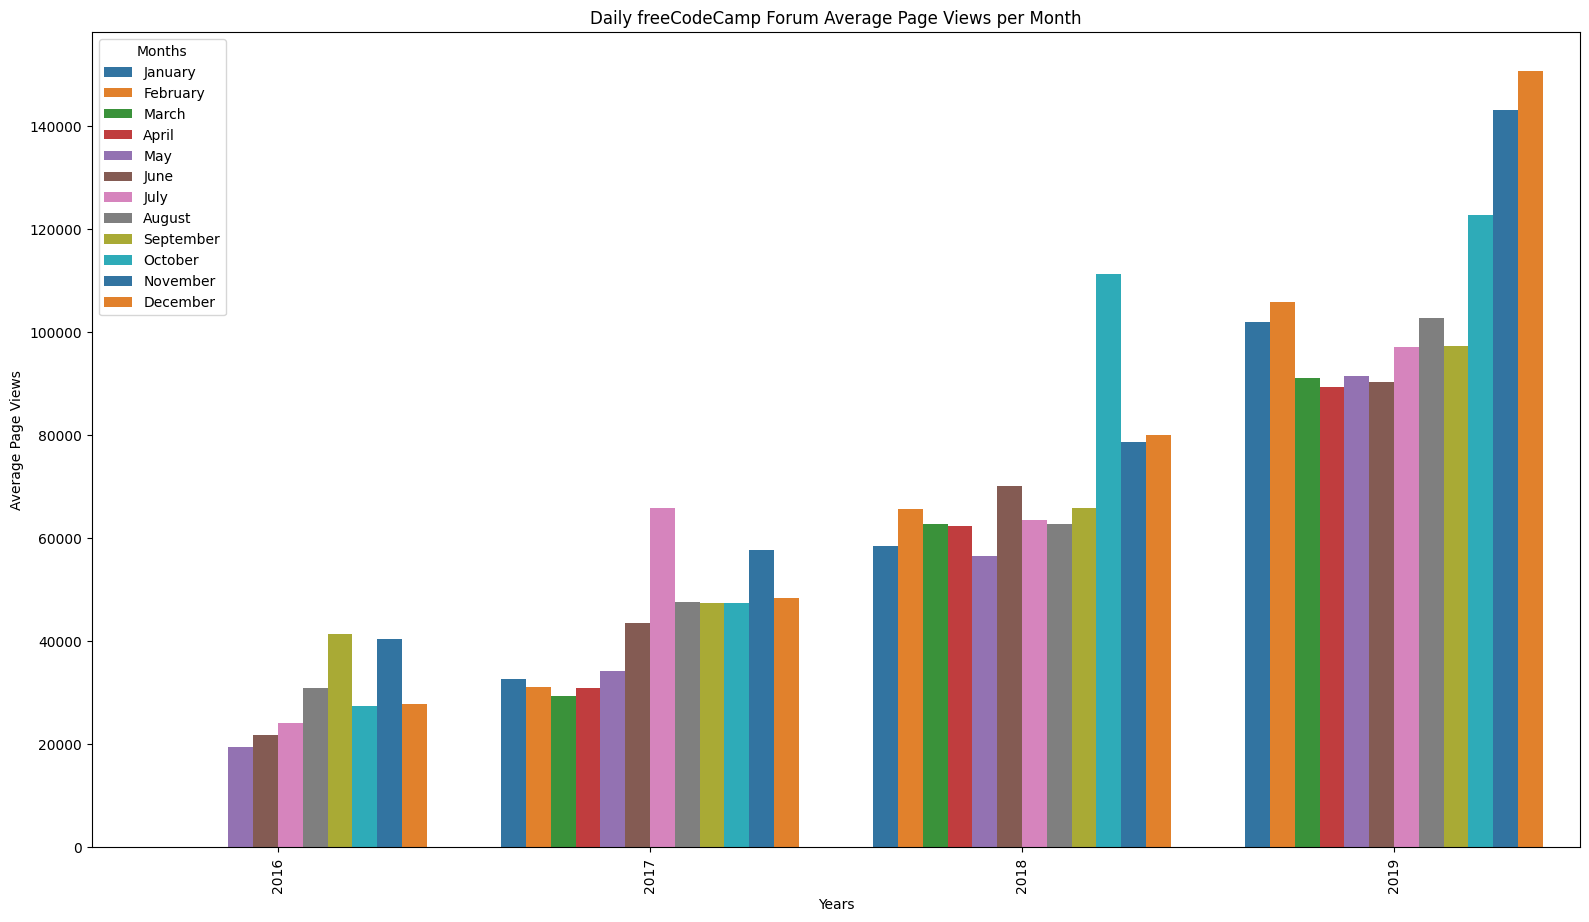

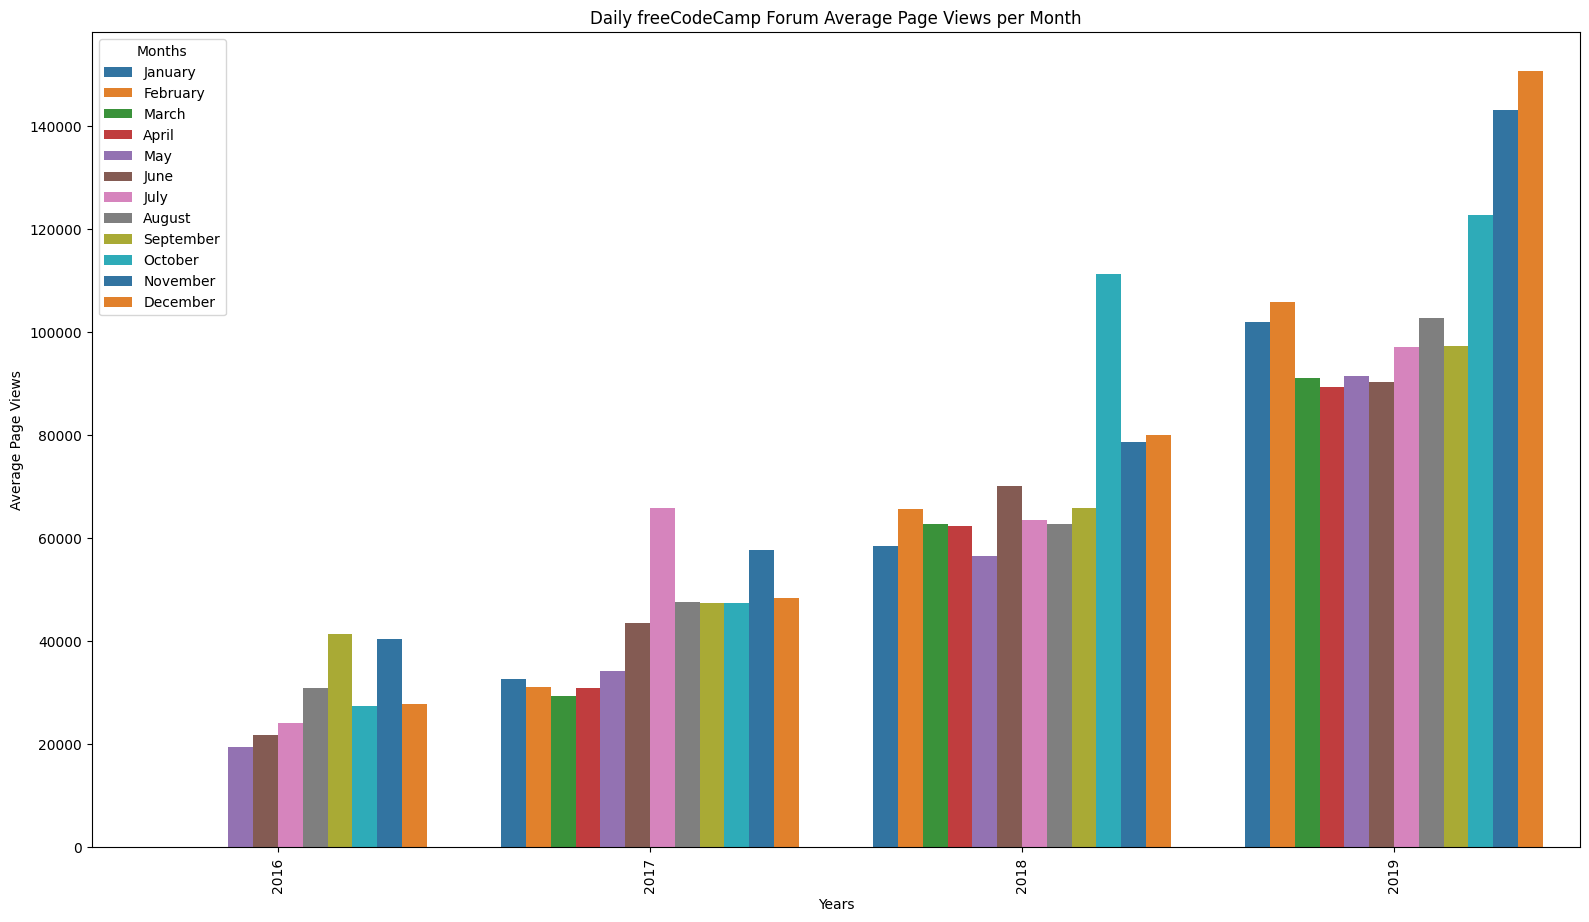

In [165]:
draw_bar_plot()

In [271]:
def draw_box_plot():

    # Prepare data for box plots (this part is done!)
    df_box = df_clean.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    months = {'ene.':'Jan', 'feb.':'Feb', 'mar.':'Mar', 'abr.':'Apr', 'may.':'May',
    'jun.':'Jun', 'jul.':'Jul', 'ago.':'Aug', 'sep.':'Sep', 'oct.':'Oct', 'nov.':'Nov', 'dic.':'Dec'}

    df_box.replace({"month": months}, inplace=True)
    #df_box['month'].map(months) 
    # df_box['month'] = df_box['month'].apply(lambda x: months[df_box['month']])

    # for i in range(len(df_box)):
    #     df_box['month'][i]=months[df_box['month'][i]]


    fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)

 # Yearly boxplot
    sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

# Monthly boxplot
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(data=df_box, x="month", y="value",  order=month_order, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")
    
    fig.savefig('box_plot.png')
    return fig

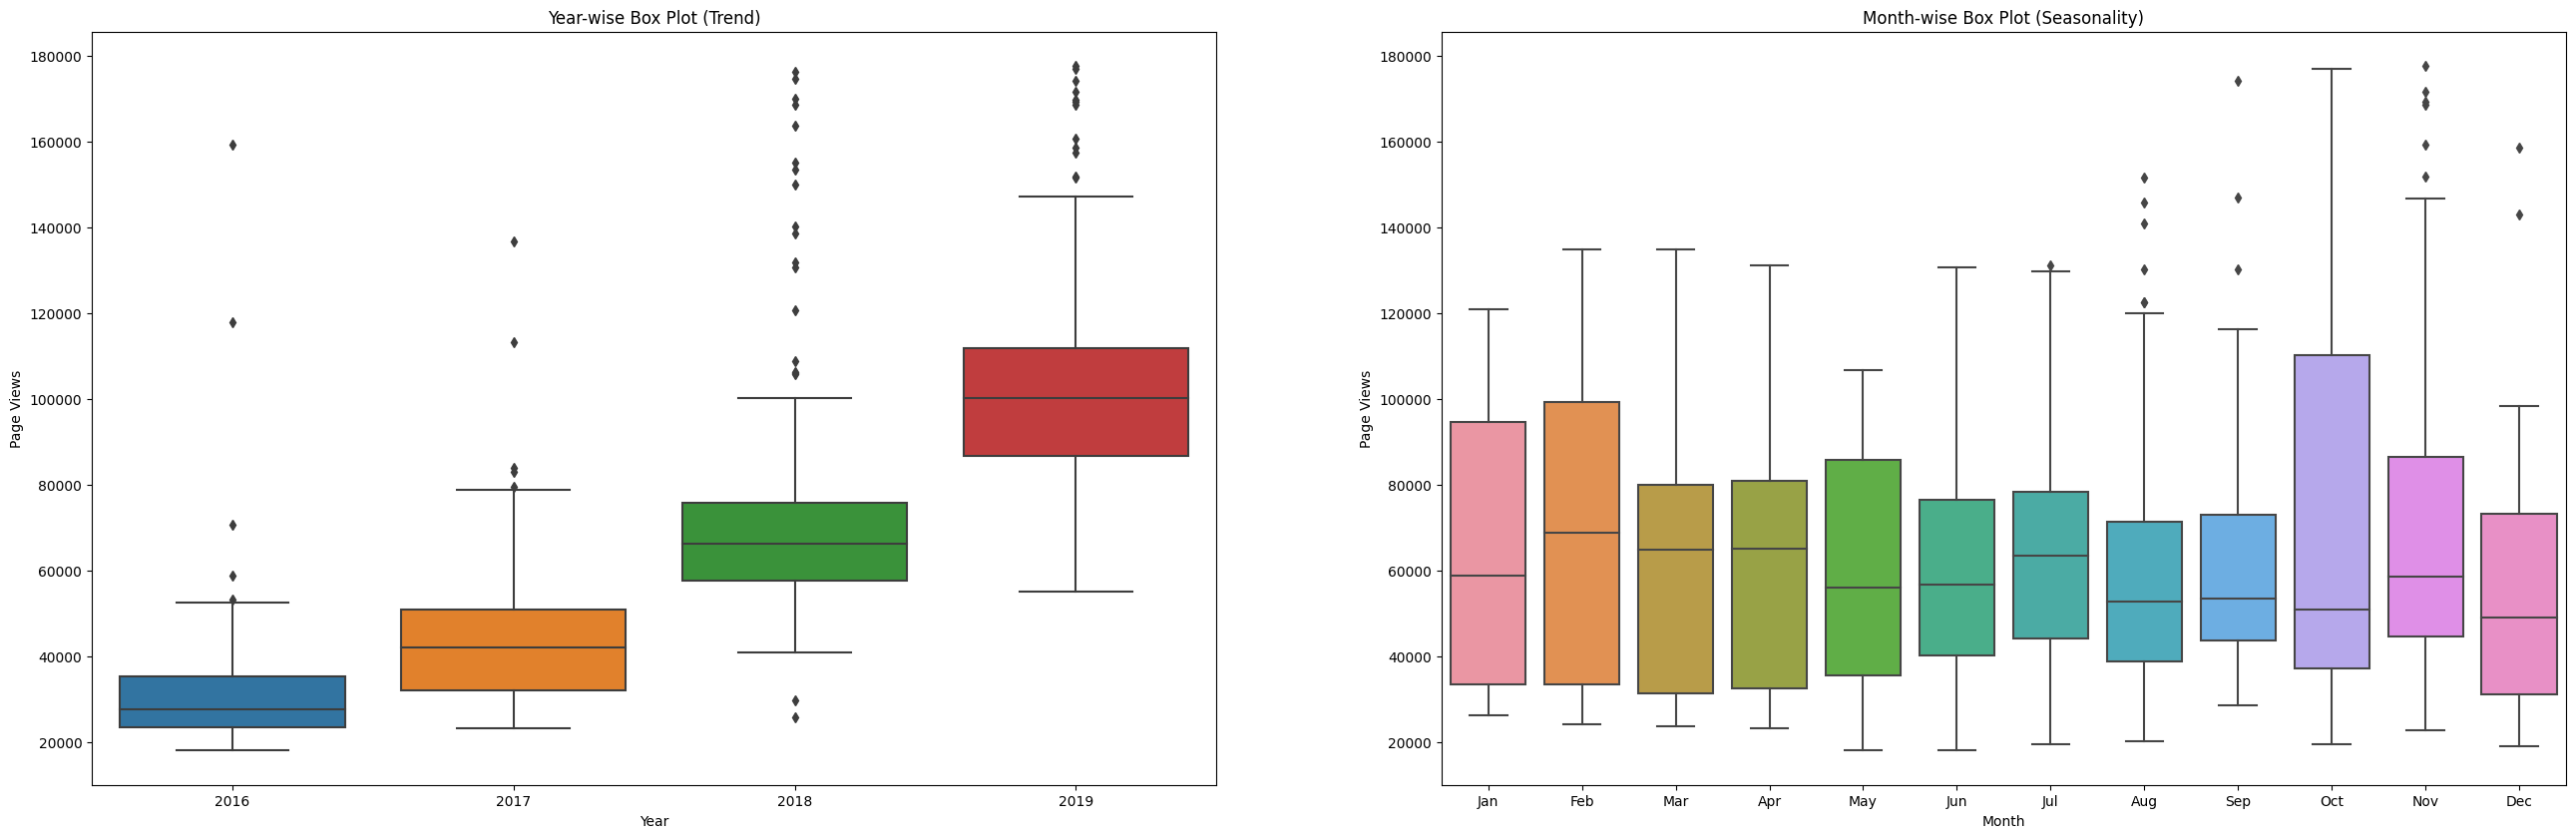

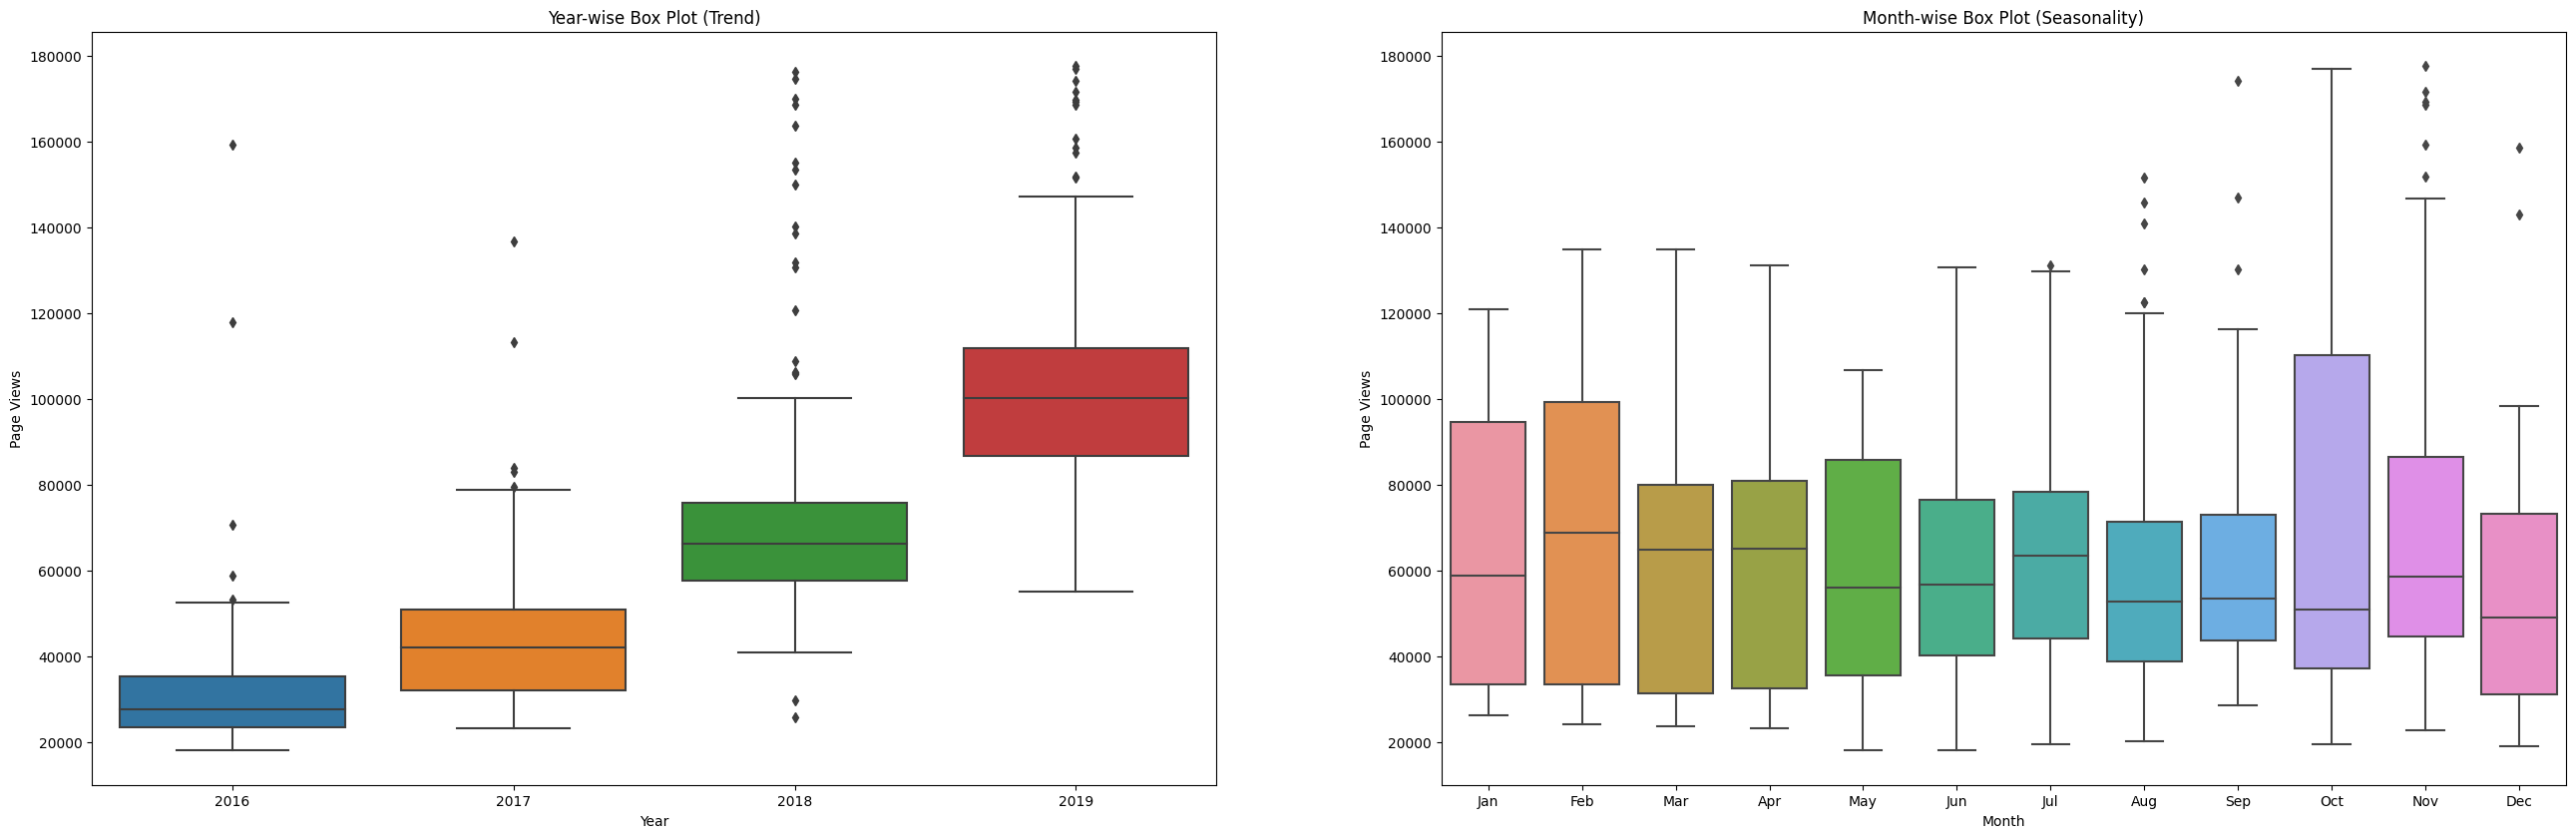

In [272]:
draw_box_plot()